# Data Science and Business Analytics Internship, The Sparks Foundation

### Task 2: Predicting the optimum number of clusters and representing it visually using Unsupervised Machine Learning

# Loading the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = df.iloc[:, [1,2,3,4]].values

In [5]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Finding the optimum number of clusters: The Elbow method

In [6]:
from sklearn.cluster import KMeans

In [7]:
wcss = []    # within cluster sum of square
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method')

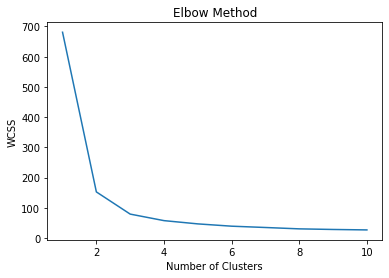

In [8]:
plt.plot(range(1,11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

From the elbow method curve the optimum number of cluster is 3

In [9]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)

In [10]:
y_pred = kmeans.fit_predict(X)

In [11]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

# Visualizing the clusters

### Vizualizing on first and second columns

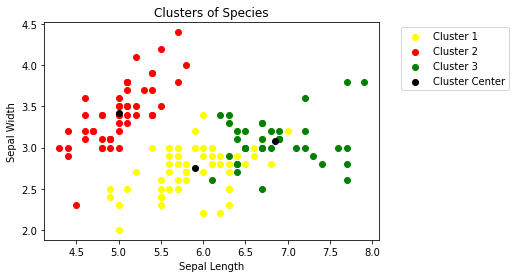

In [12]:
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],c='yellow',label='Cluster 1')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],c='red',label='Cluster 2')
plt.scatter(X[y_pred==2,0],X[y_pred==2,1],c='green',label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', label='Cluster Center')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Clusters of Species')
plt.legend(bbox_to_anchor=(1.05,1))

In [13]:
cluster_centres = pd.DataFrame(kmeans.cluster_centers_, columns=[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']], index=['Cluster 1', 'Cluster 2', 'Cluster 3'])
cluster_centres

,Sepal Length,Sepal Width,Petal Length,Petal Width
Cluster 1,5.901613,2.748387,4.393548,1.433871
Cluster 2,5.006000,3.418000,1.464000,0.244000
Cluster 3,6.850000,3.073684,5.742105,2.071053


In [14]:
df.groupby(by='Species').mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


**From the above data we can match that Cluster 1 is of Iris-versicolor, Cluster 2 is of Iris-setosa and Cluster 3 is of Iris-verginica**

### Vizualizing on first and third columns

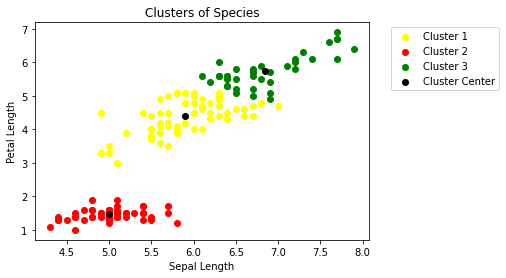

In [15]:
plt.scatter(X[y_pred==0,0],X[y_pred==0,2],c='yellow',label='Cluster 1')
plt.scatter(X[y_pred==1,0],X[y_pred==1,2],c='red',label='Cluster 2')
plt.scatter(X[y_pred==2,0],X[y_pred==2,2],c='green',label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], c='black', label='Cluster Center')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Clusters of Species')
plt.legend(bbox_to_anchor=(1.05,1))

In [16]:
cluster_centres = pd.DataFrame(kmeans.cluster_centers_, columns=[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']], index=['Cluster 1', 'Cluster 2', 'Cluster 3'])
cluster_centres

,Sepal Length,Sepal Width,Petal Length,Petal Width
Cluster 1,5.901613,2.748387,4.393548,1.433871
Cluster 2,5.006000,3.418000,1.464000,0.244000
Cluster 3,6.850000,3.073684,5.742105,2.071053


In [17]:
df.groupby(by='Species').mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


**From the above data we can match that Cluster 1 is of Iris-versicolor, Cluster 2 is of Iris-setosa and Cluster 3 is of Iris-verginica**

# Clustering by Principle Component Analysis

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()

In [20]:
scaled_X = sc.fit_transform(df.iloc[:, [1,2,3,4]].values)

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=2)

In [23]:
X_pca = pca.fit_transform(scaled_X)

In [24]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)

In [25]:
y_pca_pred = kmeans.fit_predict(X_pca)

In [26]:
y_pca_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

# Visulization of the Clusters on the two Principle Components

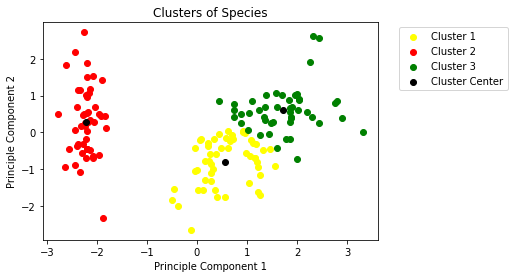

In [27]:
plt.scatter(X_pca[y_pca_pred==0,0],X_pca[y_pca_pred==0,1],c='yellow',label='Cluster 1')
plt.scatter(X_pca[y_pca_pred==1,0],X_pca[y_pca_pred==1,1],c='red',label='Cluster 2')
plt.scatter(X_pca[y_pca_pred==2,0],X_pca[y_pca_pred==2,1],c='green',label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', label='Cluster Center')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.title('Clusters of Species')
plt.legend(bbox_to_anchor=(1.05,1))

In [28]:
scaled_centers = pca.inverse_transform(kmeans.cluster_centers_)
true_centers = sc.inverse_transform(scaled_centers)

true_centers = pd.DataFrame(true_centers, columns=[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']], index=['Cluster 1', 'Cluster 2', 'Cluster 3'])
true_centers

,Sepal Length,Sepal Width,Petal Length,Petal Width
Cluster 1,5.839656,2.666404,4.308407,1.402469
Cluster 2,4.975970,3.423559,1.500132,0.258055
Cluster 3,6.770206,3.097928,5.541444,1.969498


In [29]:
df.groupby(by='Species').mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


**From the above data we can match that Cluster 1 is of Iris-versicolor, Cluster 2 is of Iris-setosa and Cluster 3 is of Iris-verginica**